In [82]:
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

### Generate N = 10000 random numbers from [0, 1]:

In [121]:
np.random.seed(seed = 42)
X = (np.random.random(10000)).reshape(10000, 1)
y = np.sqrt(1 + X)

In [122]:
X.min(), X.max()

(1.1634755366141114e-05, 0.9997176732861306)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
ones = np.ones(shape = X_train.shape)
X_train_ = np.append(X_train, ones, axis = 1)
ones = np.ones(shape = X_test.shape)
X_test_ = np.append(X_test, ones, axis = 1)

### Do linear regression on your generated data using the closed form solution.

In [26]:
def predict_closed_form(X, theta):
    return np.dot(X, theta)

In [27]:
def getThetaClosedForm(X, y):
    
    theta = np.linalg.pinv(np.dot(X.transpose(), X)).dot(X.T).dot(y)
    
    return theta

In [47]:
theta = getThetaClosedForm(X_train_, y_train)
closed_form_coef, closed_form_intercept = theta[0][0], theta[1][0]
closed_form_coef, closed_form_intercept

(0.4119081772556847, 1.0130662961403978)

In [49]:
y_pred_closed_form = predict_closed_form(X_test_, theta)
y_pred_closed_form

array([[1.16878038],
       [1.01842189],
       [1.27908582],
       ...,
       [1.40621111],
       [1.16369319],
       [1.33852787]])

### Implement with sklearn library

In [29]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
regressor.coef_, regressor.intercept_

(array([[0.41190818]]), array([1.0130663]))

In [50]:
y_pred_regressor = regressor.predict(X_test)
y_pred_regressor

array([[1.16878038],
       [1.01842189],
       [1.27908582],
       ...,
       [1.40621111],
       [1.16369319],
       [1.33852787]])

In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_regressor))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_regressor))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_regressor)))

Mean Absolute Error: 0.004563595023893373
Mean Squared Error: 2.8112123085725614e-05
Root Mean Squared Error: 0.005302086672785123


### Do linear regression on your generated data implementing the gradient descent algorithm by yourself.

In [51]:
def cost_function(theta0, theta1, X, y):
    cost = 0
    for i in range(len(X)):
        hypoth = theta0 + theta1 * X[i]
        cost += (hypoth - y[i]) ** 2
    
    return cost / (2 * len(X))

In [52]:
def gradient_step(theta0_current, theta1_current, X, y):
    dtheta0, dtheta1 = 0, 0
    for i in range(len(X)):
        hypoth = theta0_current + theta1_current * X[i]
        dtheta0 += (hypoth - y[i])
        dtheta1 += (hypoth - y[i]) * X[i]
    
    m = len(X)
    
    return [dtheta0 / m, dtheta1 / m]

In [35]:
num_iterations = 1000
theta0, theta1 = 0, 0
learning_rate = 0.01
for i in range(num_iterations):
    dtheta0, dtheta1 = gradient_step(theta0, theta1, X_train, y_train)
    theta0 -= learning_rate * dtheta0
    theta1 -= learning_rate * dtheta1
    
cost_function(theta0, theta1, X_train, y_train)

array([0.00012212])

In [17]:
theta1, theta0

(array([0.4622058]), array([0.98644168]))

In [53]:
y_pred_gradient = theta0 + theta1 * X_test
y_pred_gradient

array([[1.16102228],
       [0.99207322],
       [1.28496607],
       ...,
       [1.42780935],
       [1.1553061 ],
       [1.35175764]])

### Do linear regression on your generated data using tensorflow.

### Sketch the graphs of all approximations on one graph.

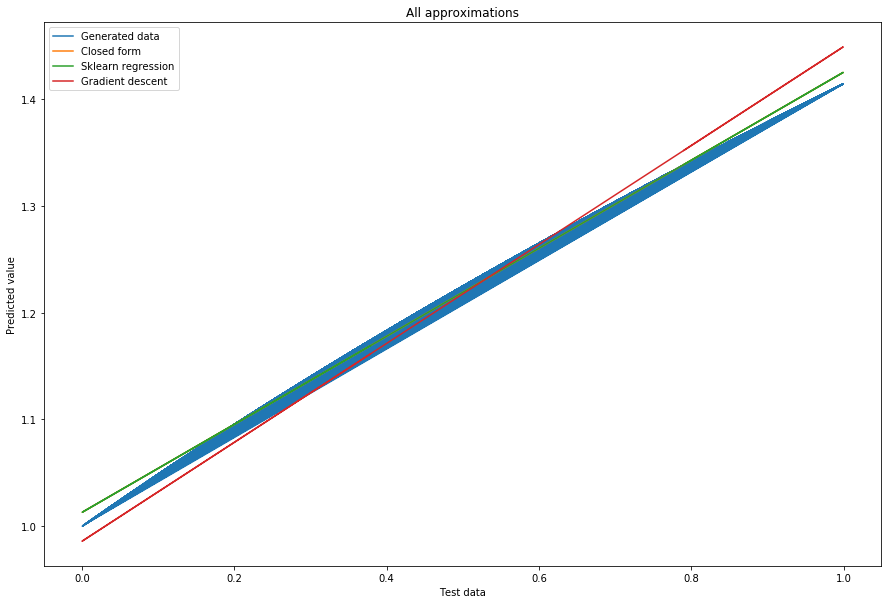

In [87]:
# need to add also tensorflow solution
plt.figure(figsize = (15, 10))
plt.plot(X_test, y_test, label = 'Generated data')
plt.plot(X_test, y_pred_closed_form, label = 'Closed form')
plt.plot(X_test, y_pred_regressor, label = 'Sklearn regression')
plt.plot(X_test, y_pred_gradient, label = 'Gradient descent')
plt.legend()
plt.title('All approximations')
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.show()

### Taylor approximation

f(x) ~ f(a) + f'(a)*(x - a)

In [65]:
def derivative(point):
    return (1 / 2) * (1 + point)**(-1/2)

In [76]:
def taylor_approximation(point):
    return 1 + derivative(point[0])*point[0]

In [79]:
y_pred_taylor = list(map(taylor_approximation, X_test))
y_pred_taylor = np.array(y_pred_taylor).reshape((len(y_pred_taylor), 1))

In [80]:
y_pred_taylor

array([[1.16101561],
       [1.00645911],
       [1.25170487],
       ...,
       [1.34135802],
       [1.1564579 ],
       [1.29527512]])

### Compare all solutions with the first degree Taylor approximation of the function

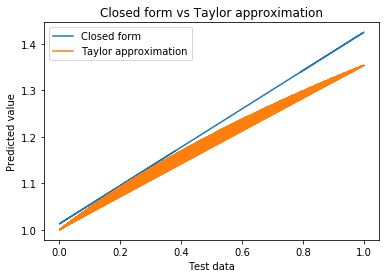

In [97]:
# closed form solution
plt.plot(X_test, y_pred_closed_form, label = 'Closed form')
plt.plot(X_test, y_pred_taylor, label = 'Taylor approximation')
plt.legend()
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.title('Closed form vs Taylor approximation')
plt.show()

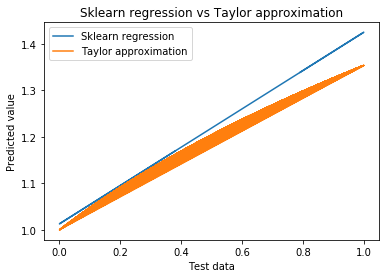

In [98]:
# sklearn solution
plt.plot(X_test, y_pred_regressor, label = 'Sklearn regression')
plt.plot(X_test, y_pred_taylor, label = 'Taylor approximation')
plt.legend()
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.title('Sklearn regression vs Taylor approximation')
plt.show()

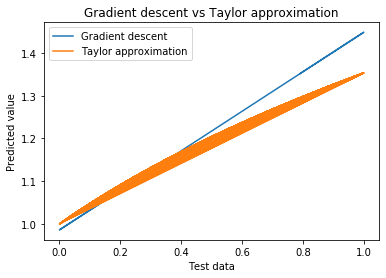

In [99]:
# gradient descent solution
plt.plot(X_test, y_pred_gradient, label = 'Gradient descent')
plt.plot(X_test, y_pred_taylor, label = 'Taylor approximation')
plt.legend()
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.title('Gradient descent vs Taylor approximation')
plt.show()

### Implement the polynomial regression using linear regression

In [103]:
from sklearn.preprocessing import PolynomialFeatures

In [106]:
poly_features = PolynomialFeatures(degree=2)

In [107]:
X_train_poly = poly_features.fit_transform(X_train)

In [109]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

In [113]:
poly_features

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

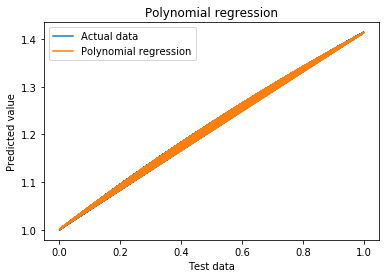

In [118]:
plt.plot(X_test, y_test, label = 'Actual data')
plt.plot(X_test, y_test_predict, label = 'Polynomial regression')
plt.legend()
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.title('Polynomial regression')
plt.show()